In [ ]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
def gamma_model(x, a, b, c):
    # a: peak latency
    # b: peak amplitude
    # c: baseline
    return gamma.pdf(x, a)/np.max(gamma.pdf(x, a))*b + c

[4.25298024 0.94762306 0.02306666]


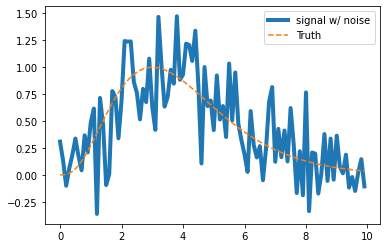

In [27]:
xv = np.arange(0, 10, 0.1)
noise = np.random.normal(size=xv.size, scale=0.3)

signal = gamma_model(xv, 4, 1, 0)
signal_plus_noise = signal + noise

plt.plot(xv, signal_plus_noise, label='signal w/ noise', lw=4)
plt.plot(xv, signal, label='Truth', ls='--')
plt.legend()

init_vals = [4, 1, 0]
best_vals, covar = curve_fit(gamma_model, xv, signal_plus_noise, bounds=((3, -np.inf, -np.inf),(8, np.inf, np.inf)))

print(best_vals)